<a href="https://colab.research.google.com/github/lee-53/ECE-4380-F25/blob/main/Clear_NumpyTFandVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy, TF, and Visualization

## Start by importing necessary packages
We will begin by importing necessary libraries for this notebook. Run the cell below to do so.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

## Visualizations

Visualization is a key factor in understanding deep learning models and their behavior. Typically, pyplot from the matplotlib package is used, capable of visualizing series and 2D data.

Below is an example of visualizing series data.

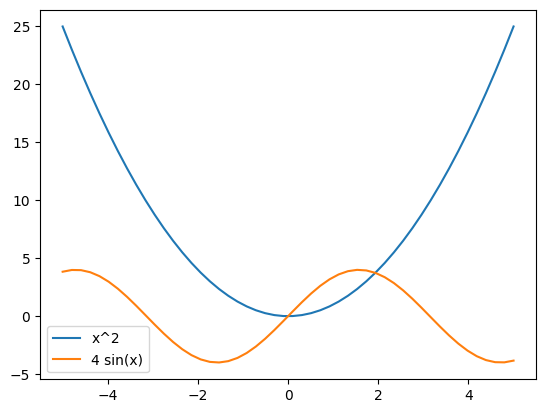

In [2]:
x = np.linspace(-5, 5, 50) # create a linear spacing from x = -5.0 to 5.0 with 50 steps

y1 = x**2      # create a series of points {y1}, which corresponds to the function f(x) = y^2
y2 = 4*np.sin(x) # create another series of points {y2}, which corresponds to the function f(x) = 4*sin(x)  NOTE: we have to use np.sin and not math.sin as math.sin will only act on individual values
# to use math.sin, we could have used a list comprehension instead: y2 = [math.sin(xi) for xi in x]

# by default, matplotlib will behave like MATLAB with hold(True), overplotting until a new figure object is created
plt.plot(x, y1, label="x^2")        # plot y1 with x as the x-axis series, and label the line "x^2"
plt.plot(x, y2, label="4 sin(x)")   # plot y2 with x as the x-axis series, and label the line "4 sin(x)"
plt.legend()                        # have matplotlib show the label on the plot

More complex formatting can be added to increase the visual appeal and readability of plots (especially for paper quality figures).
To try this out, let's consider plotting a few of the more common activation functions used in machine learning.
Below, plot the following activation functions for $x\in[-4, 4]$:


*   ReLU: $max(x, 0)$
*   Leaky-ReLU: $max(0.1\cdot x, x)$
*   Sigmoid: $\sigma(x) = 1/(1 + e^{-x})$
*   Hyperbolic Tangent: $\mathrm{tanh}(x) = (e^{x} - e^{-x})/(e^{x} + e^{-x})$
*   SiLU: $x \cdot \sigma(x)$
*   GeLU: $x \cdot \frac{1}{2} \left(1 + \mathrm{erf}\left(\frac{x}{\sqrt{2}}\right)\right)$
*   tanh GELU: $x \cdot \frac{1}{2} \left(1 + \mathrm{tanh}\left(\frac{x}{\sqrt{2}}\right)\right)$

Plot the GELU and tanh GELU using the same color, but with tanh using a dashed line (tanh is a common approximation as the error-function is computationally expensive to compute).
You may also need to adjust the legend to make it easier to read.
I recommend using ChatGPT to help find the formatting options here.

**Question 1**



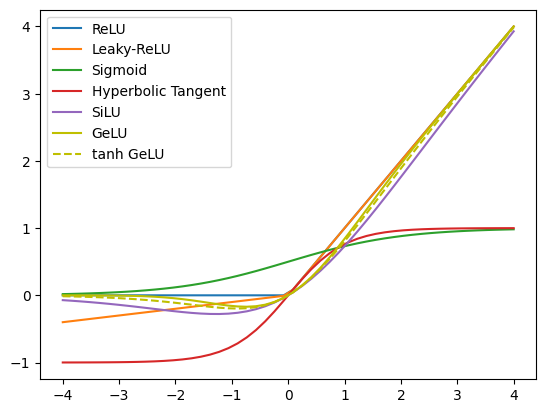

In [3]:
x = np.linspace(-4, 4, 50) # create a linear spacing from x = -4.0 to 4.0 with 50 steps
# create and plot the functions below
relu = np.maximum(x, 0)

leaky_relu = np.maximum(x, 0.1 * x)

sigmoid = 1 / (1 + np.exp(-x))

hyperbolic_tangent = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

silu = x * sigmoid

vectorized_erf = np.vectorize(math.erf)
gelu = x * 0.5 * (1 + vectorized_erf(x / np.sqrt(2)))

tanh_gelu = x * 0.5 * (1 + np.tanh(x / np.sqrt(2)))

plt.plot(x, relu, label="ReLU")
plt.plot(x, leaky_relu, label="Leaky-ReLU")
plt.plot(x, sigmoid, label="Sigmoid")
plt.plot(x, hyperbolic_tangent, label="Hyperbolic Tangent")
plt.plot(x, silu, label="SiLU")
plt.plot(x, gelu, label="GeLU", color='y')
plt.plot(x, tanh_gelu, label="tanh GeLU", color='y', linestyle='dashed')
plt.legend()

Answer to the following questions from the the plot you just created:


1.   Which activation function is the least computationally expensive to compute?
2.   Are there better choices to ensure more stable training? What downfalls do you think it may have?
3.   Are there any cases where you would not want to use either activation function?

**Question 2**

1. From the listed activation functions, the ReLU activation function is the least computationally expensive to compute, as it does not contain any floating point operations.

2. The ReLU activation function has the downside that the gradient is not continuous at x = 0. The sigmoid function solves this issue, as it is smooth and still bounded from 0 to 1.

3. However, having the activation function be bounded from 0 to 1 can be a downside. Having the activation function be centered around 0, like the hyperbolic tangent is, allows the weights to move more freely during training.

### Visualizing 2D data

In many cases, we also want the ability to visualize multi-dimensional data such as images. To do so, matplotlib has the imshow method, which can visualize single channel data with a heatmap, or RGB data with color.

Let's consider visualizing the first 8 training images from the MNIST dataset. MNIST consists of hand drawn digits with their corresponding labels (a number from 0 to 9).

We will use the tensorflow keras dataset library to load the dataset, and then visualize the images with a matplotlib subplot.
Because we have so many images, we should arrange them in a grid (4 horizontal, 2 vertical), and plot each image in a loop.
Furthermore, we can append the label to each image using the matplotlib utility.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


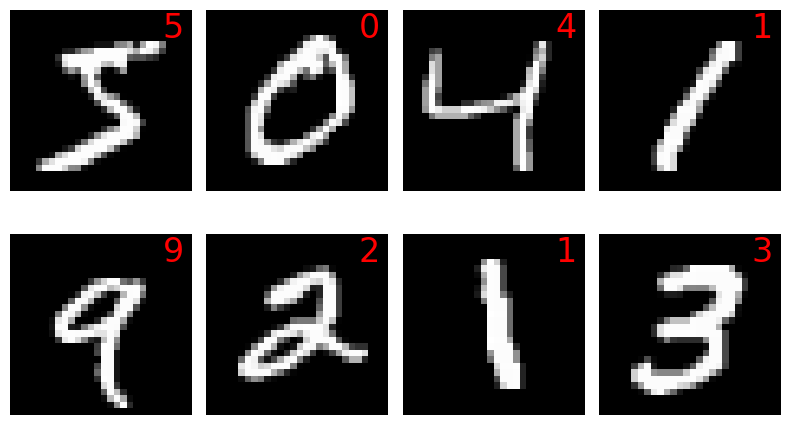

In [4]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Define the grid dimensions
rows, cols = 2, 4

# Create a figure and axes for the grid
fig, axes = plt.subplots(rows, cols, figsize=(8, 5))

# Iterate through the grid
for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        ax = axes[i, j]

        # Display the image
        ax.imshow(train_images[index], cmap='gray')

        # Display the label on top of the image in red text
        ax.text(0.9, 0.9, str(train_labels[index]), color='red',
                transform=ax.transAxes, fontsize=24,
                ha='center', va='center')

        # Turn off axis labels
        ax.axis('off')

# Adjust spacing and layout
plt.tight_layout()

Another popular image dataset for benchmarking and evaluation is CFAR-10. This dataset consists of small (32 x 32 pixel) RGB images of objects that fall into one of 10 classes:

0.   airplane
1.   automobile
2.   bird
3.   cat
4.   deer
5.   dog
6.   frog
7.   horse
8.   ship
9.  truck


Plot the first 32 images in the dataset using the same method above.

**Question 3**

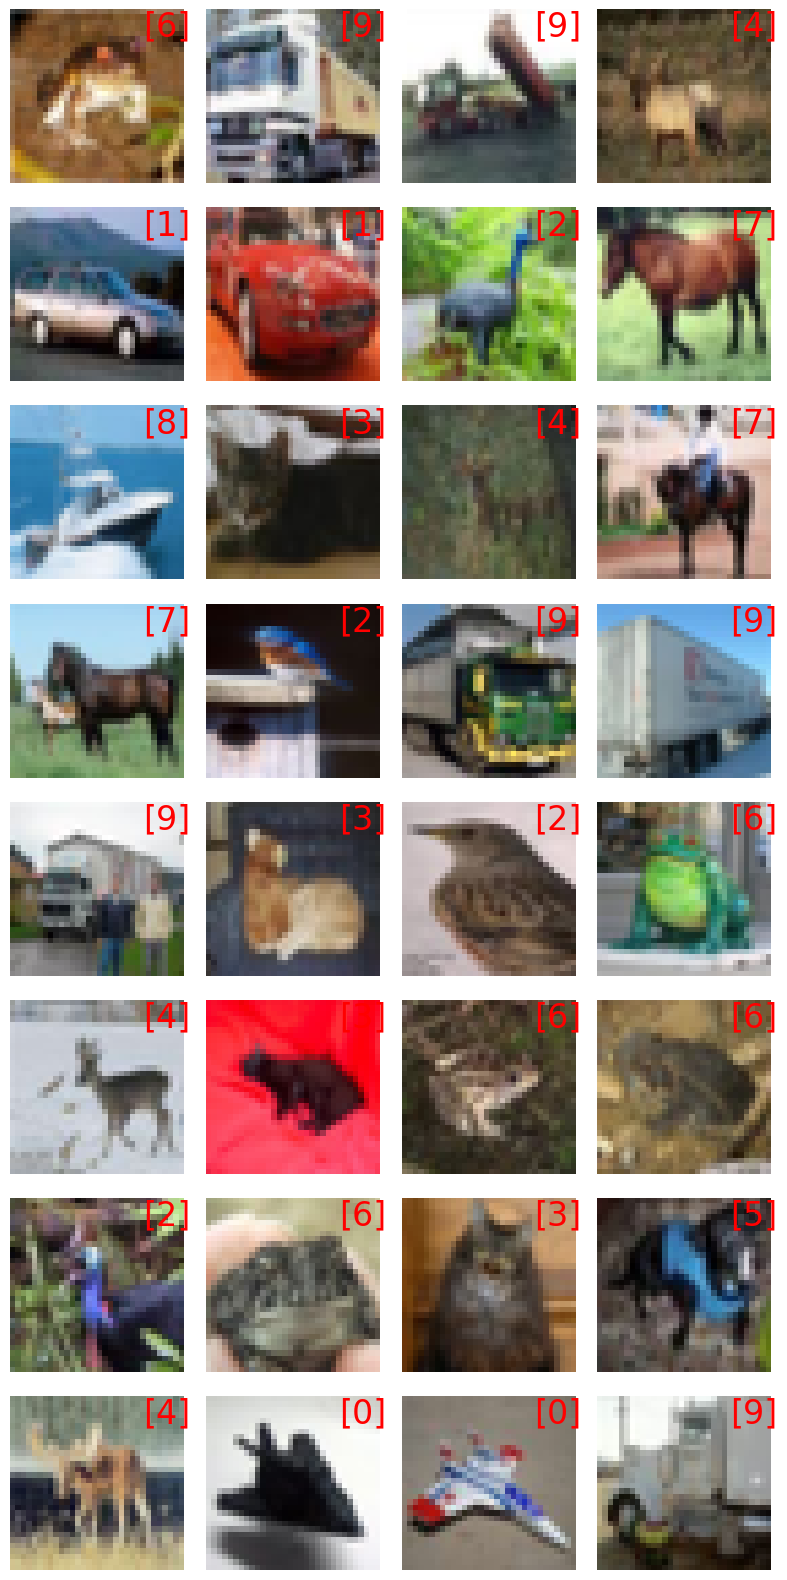

In [7]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# add your plotting code below
rows, cols = 8, 4

fig, axes = plt.subplots(rows, cols, figsize=(8, 16))

for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        ax = axes[i, j]

        ax.imshow(train_images[index], cmap='gray')

        ax.text(0.9, 0.9, str(train_labels[index]), color='red',
                transform=ax.transAxes, fontsize=24,
                ha='center', va='center')

        ax.axis('off')

plt.tight_layout()

### Visualizing Tensors

Aside from visualzing linear functions and images, we can also visualize entire tensors from DL models.

In [8]:
# first, let's download an existing model to inspect
model = tf.keras.applications.VGG16(weights='imagenet')

# can then print the summary of what the model is composed of
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
# we can also print the model layers based on index to better understand the structure
for i,layer in enumerate(model.layers):
  print(f"{i}: {layer}")

0: <InputLayer name=input_layer, built=True>
1: <Conv2D name=block1_conv1, built=True>
2: <Conv2D name=block1_conv2, built=True>
3: <MaxPooling2D name=block1_pool, built=True>
4: <Conv2D name=block2_conv1, built=True>
5: <Conv2D name=block2_conv2, built=True>
6: <MaxPooling2D name=block2_pool, built=True>
7: <Conv2D name=block3_conv1, built=True>
8: <Conv2D name=block3_conv2, built=True>
9: <Conv2D name=block3_conv3, built=True>
10: <MaxPooling2D name=block3_pool, built=True>
11: <Conv2D name=block4_conv1, built=True>
12: <Conv2D name=block4_conv2, built=True>
13: <Conv2D name=block4_conv3, built=True>
14: <MaxPooling2D name=block4_pool, built=True>
15: <Conv2D name=block5_conv1, built=True>
16: <Conv2D name=block5_conv2, built=True>
17: <Conv2D name=block5_conv3, built=True>
18: <MaxPooling2D name=block5_pool, built=True>
19: <Flatten name=flatten, built=True>
20: <Dense name=fc1, built=True>
21: <Dense name=fc2, built=True>
22: <Dense name=predictions, built=True>


Not all of these layers contain weights, for example, MaxPooling2D is a stateless operation, and so is Flatten.
Conv2D and Dense are the two layer types that can be visualized.
That said, let's visualize the filter kernels in the first convoluton layer.

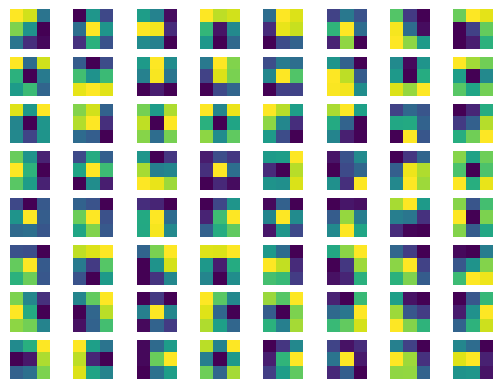

In [10]:
# next we can extract som
layer = model.layers[1] # Get the first convolutional layer
weights = layer.get_weights()[0]

n_filters = weights.shape[-1]

for i in range(n_filters):
    plt.subplot(8, 8, i+1)  # Assuming 64 filters, adjust if necessary
    plt.imshow(weights[:, :, 0, i], cmap="viridis")
    plt.axis('off')

Aside from visualizing the weights directly, we can also compute and visualize the weight distribution using a histogram.

weight tensor has mean: -0.0024379086680710316 and variance: 0.04272466152906418


(array([ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  2.,
         2.,  7.,  2.,  4.,  7.,  6.,  6., 11.,  7.,  9., 12.,  6.,  9.,
        17., 11., 14., 10., 23., 18., 14., 15., 25., 20., 25., 38., 35.,
        38., 44., 32., 41., 42., 44., 38., 36., 32., 42., 40., 31., 23.,
        52., 32., 28., 52., 35., 24., 26., 40., 44., 45., 46., 43., 43.,
        42., 31., 24., 25., 18., 26., 23., 16., 18., 14., 15., 16.,  7.,
        10., 12., 14., 10.,  5.,  9., 10.,  3.,  7.,  4.,  2.,  1.,  2.,
         3.,  2.,  2.,  1.,  1.,  1.,  1.,  0.,  1.]),
 array([-0.67140007, -0.65860093, -0.64580172, -0.63300258, -0.62020344,
        -0.60740429, -0.59460509, -0.58180594, -0.5690068 , -0.55620766,
        -0.54340845, -0.53060931, -0.51781011, -0.50501096, -0.49221182,
        -0.47941267, -0.4666135 , -0.45381433, -0.44101518, -0.42821604,
        -0.41541687, -0.40261769, -0.38981855, -0.37701938, -0.3642202 ,
        -0.35142106, -0.33862188, -0.32582274, -0.31302357, -0.300224

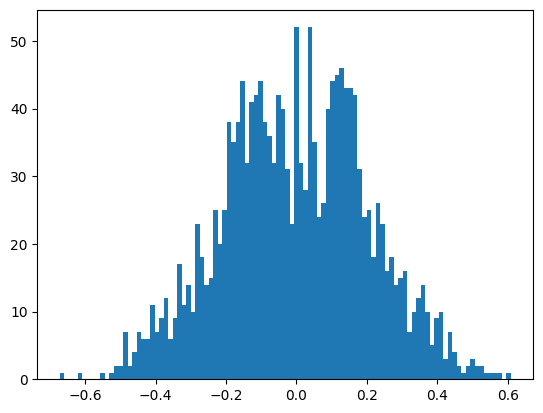

In [11]:

# we can use the mean and var (variance) functions built in to calculate some simple statistics
print(f"weight tensor has mean: {weights.mean()} and variance: {weights.var()}")

# we need to call .flatten() on the tensor so that all the histogram sees them as a 1D array. Then we can plot with 100 bins to get a bit more resolution in the histogram.
plt.hist(weights.flatten(), bins=100)

Look through the other weight tensors in the network and note any patterns that can be observed. Plot some examples in a subplot grid (include at least 4 plots).
You can also overplot on the same subplot if you find that helpful for visualization.

**Question 4**

5th layer weight tensor has mean: -0.0002807714627124369 and variance: 0.0005541605059988797
11th layer weight tensor has mean: -0.000449347251560539 and variance: 0.00010103554086526856
21st layer weight tensor has mean: -0.0003707825962919742 and variance: 1.9221162801841274e-05
22nd layer weight tensor has mean: -5.359512442737469e-07 and variance: 6.855797983007506e-05


Text(0.9, 0.9, '22nd layer')

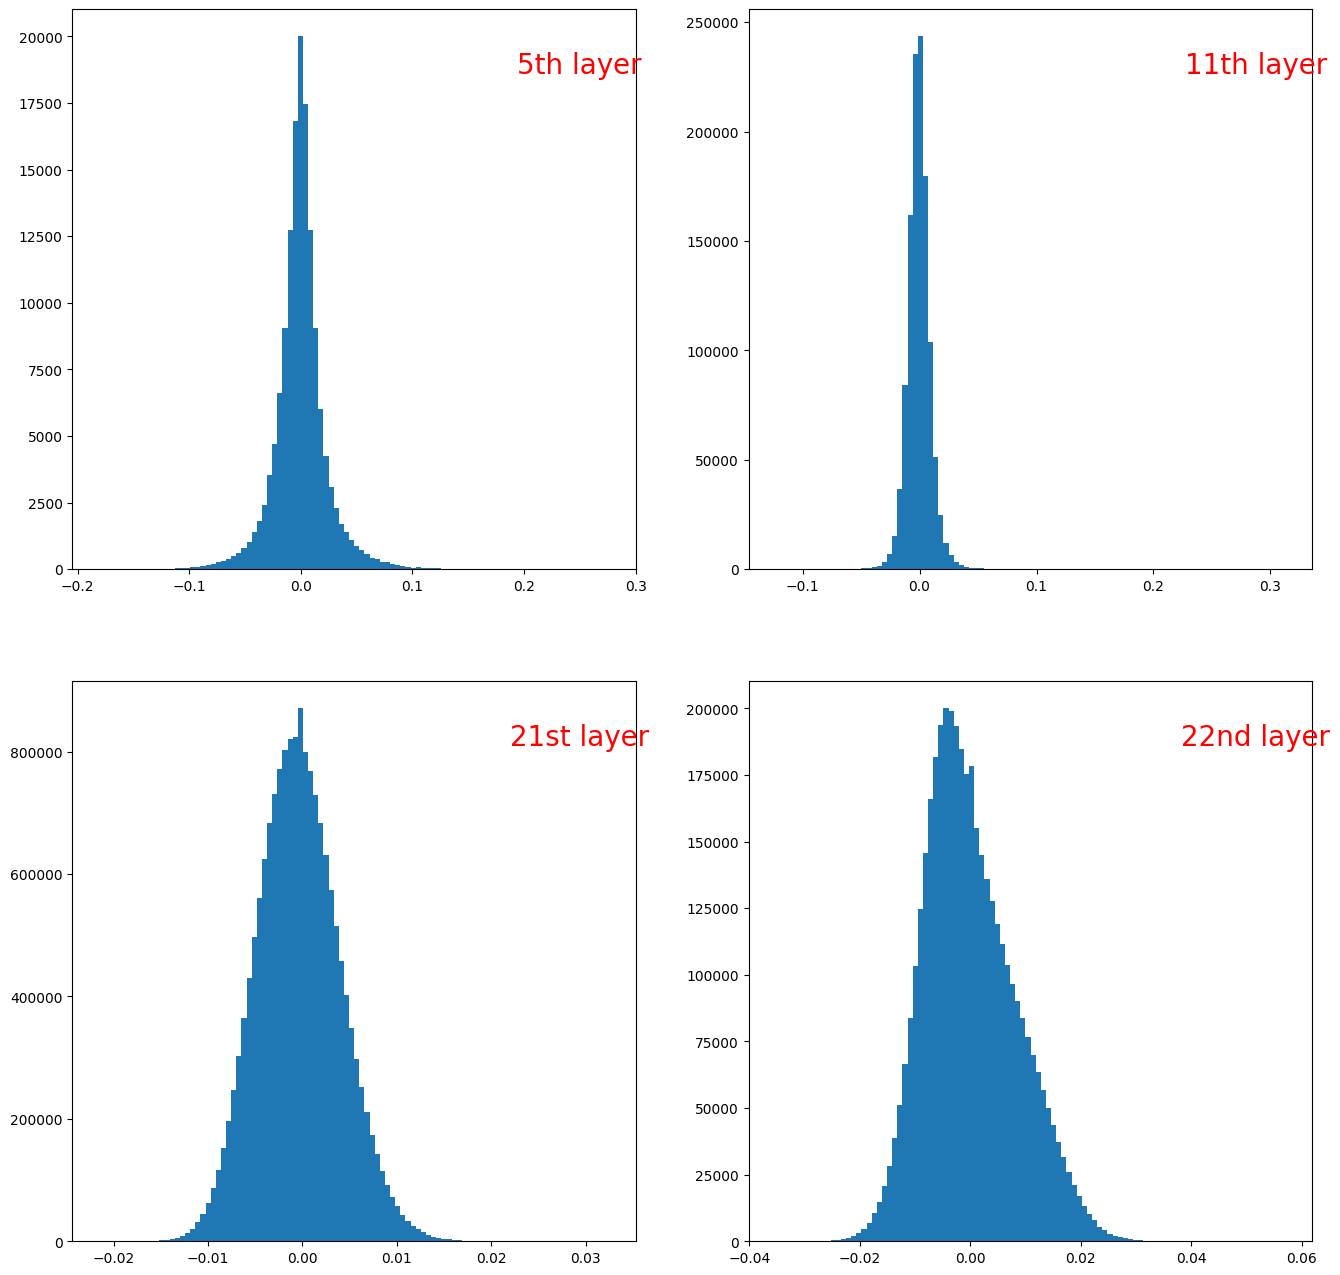

In [20]:
# enter plot code below
rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(16, 16))

layer = model.layers[5]
weights = layer.get_weights()[0]
print(f"5th layer weight tensor has mean: {weights.mean()} and variance: {weights.var()}")
ax = axes[0,0]
ax.hist(weights.flatten(), bins=100)
ax.text(0.9, 0.9, "5th layer", color='red',
                transform=ax.transAxes, fontsize=20,
                ha='center', va='center')

layer = model.layers[11]
weights = layer.get_weights()[0]
print(f"11th layer weight tensor has mean: {weights.mean()} and variance: {weights.var()}")
ax = axes[0,1]
ax.hist(weights.flatten(), bins=100)
ax.text(0.9, 0.9, "11th layer", color='red',
                transform=ax.transAxes, fontsize=20,
                ha='center', va='center')

layer = model.layers[21]
weights = layer.get_weights()[0]
print(f"21st layer weight tensor has mean: {weights.mean()} and variance: {weights.var()}")
ax = axes[1,0]
ax.hist(weights.flatten(), bins=100)
ax.text(0.9, 0.9, "21st layer", color='red',
                transform=ax.transAxes, fontsize=20,
                ha='center', va='center')

layer = model.layers[22]
weights = layer.get_weights()[0]
print(f"22nd layer weight tensor has mean: {weights.mean()} and variance: {weights.var()}")
ax = axes[1,1]
ax.hist(weights.flatten(), bins=100)
ax.text(0.9, 0.9, "22nd layer", color='red',
                transform=ax.transAxes, fontsize=20,
                ha='center', va='center')




We can also visualize the activations within the network, this is done by applying a forward pass with a data input, and extracting the intermediate result. Below is an example output from the first convolution layer.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


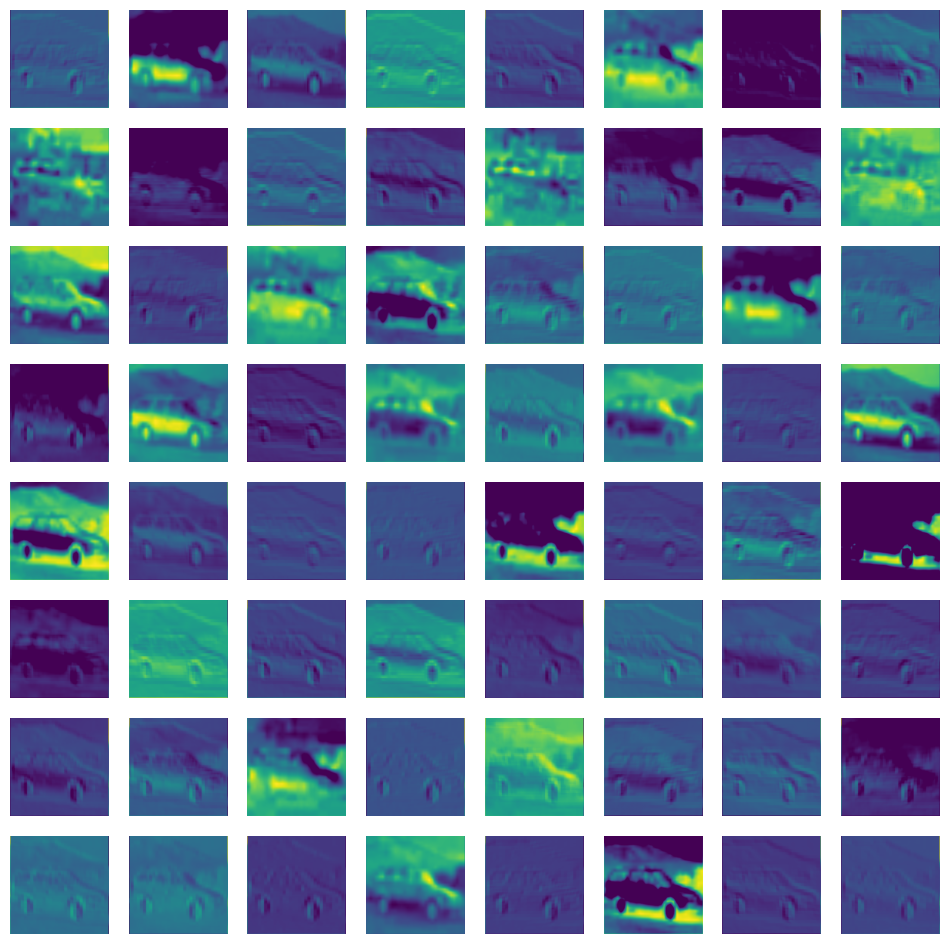

In [21]:
# Resize and normalize the images to be suitable for VGG16
train_images_resized = tf.image.resize(train_images[4:5], [224, 224])

# Normalize the pixel values to [0,1]
train_images_resized = train_images_resized / 255.0

layer = model.layers[1] # Get the first convolutional layer
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=layer.output)
activation = intermediate_layer_model.predict(train_images_resized)

# get the feature count from the activations
n_features = activation.shape[-1]

# Set the figure size
plt.figure(figsize=(12, 12))

for i in range(n_features):
    plt.subplot(8, 8, i+1)  # Assuming 64 features, adjust if necessary
    plt.imshow(activation[0, :, :, i], cmap="viridis")
    plt.axis('off')

Using the above code for the forward pass, and the layer indices, plot the activation distributions for the final three dense layers.

**Question 5**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
First dense layer weight tensor has mean: -5.359512442737469e-07 and variance: 6.855797983007506e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
Second dense layer weight tensor has mean: -5.359512442737469e-07 and variance: 6.855797983007506e-05
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 773ms/step
Third dense layer weight tensor has mean: -5.359512442737469e-07 and variance: 6.855797983007506e-05


Text(0.9, 0.9, '3rd dense layer')

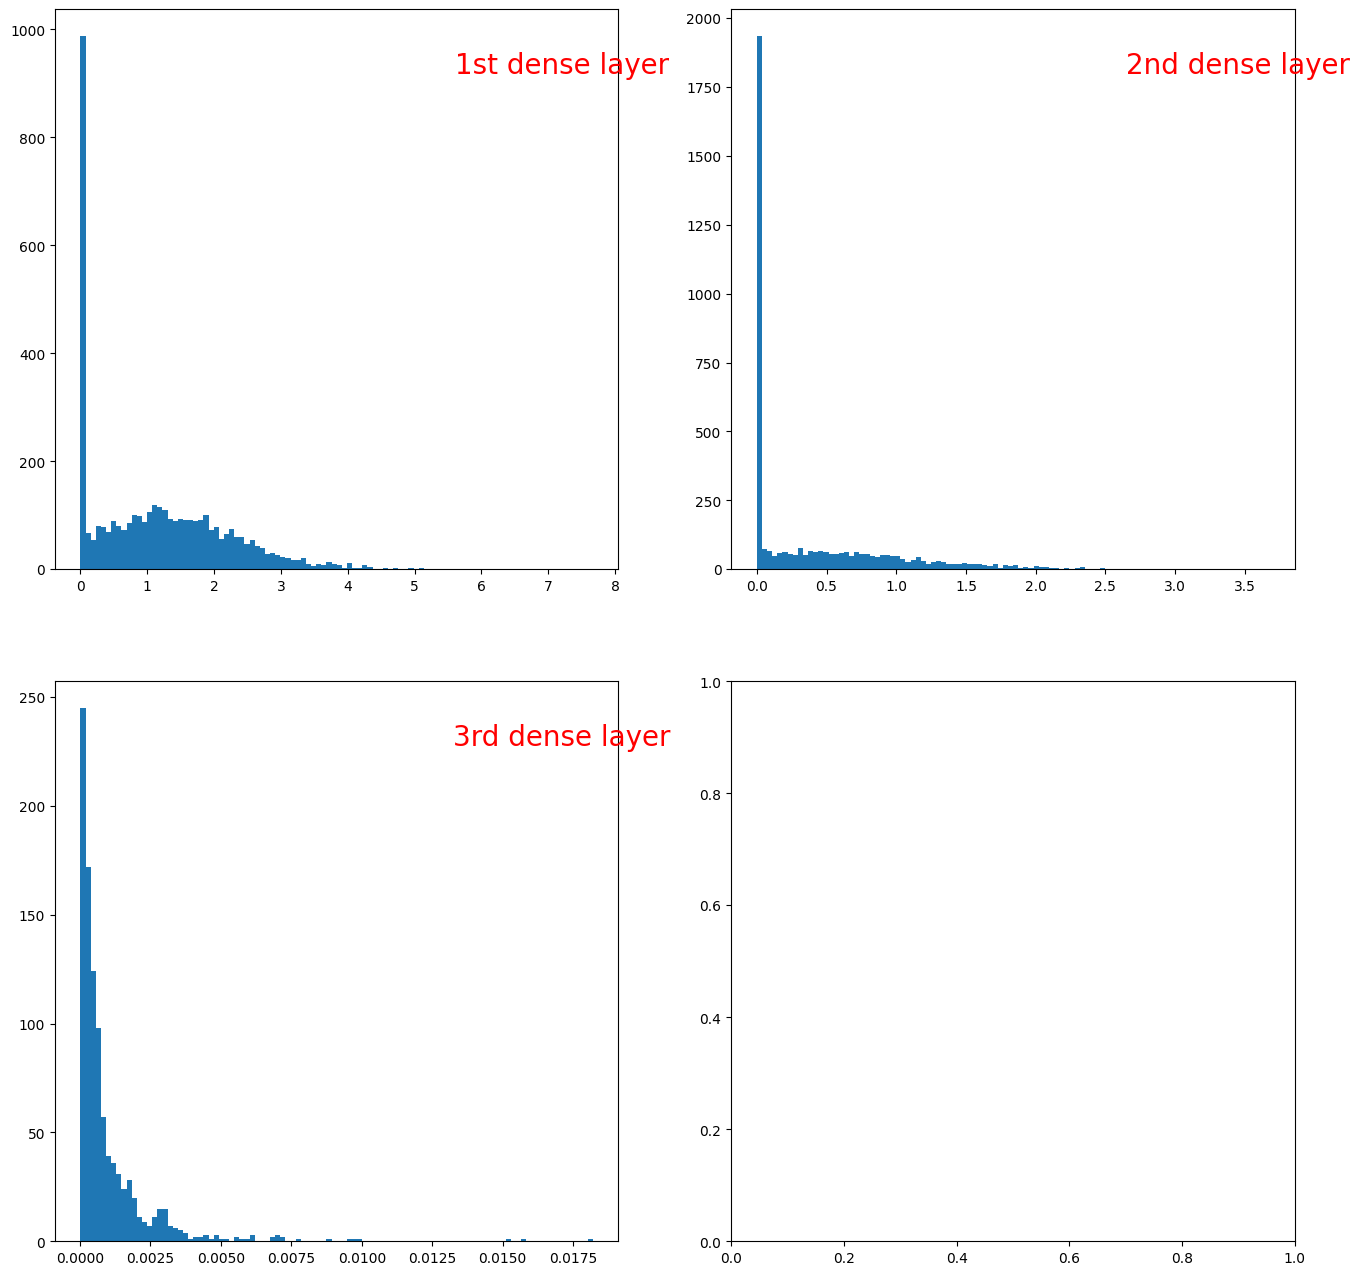

In [26]:
# Dense layer plot code below
rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(16, 16))

# first dense layer
# Resize and normalize the images to be suitable for VGG16
train_images_resized = tf.image.resize(train_images[4:5], [224, 224])

# Normalize the pixel values to [0,1]
train_images_resized = train_images_resized / 255.0

layer = model.layers[20] # Get the first dense layer
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=layer.output)
activation = intermediate_layer_model.predict(train_images_resized)

print(f"First dense layer weight tensor has mean: {weights.mean()} and variance: {weights.var()}")
ax = axes[0,0]
ax.hist(activation.flatten(), bins=100)
ax.text(0.9, 0.9, "1st dense layer", color='red',
                transform=ax.transAxes, fontsize=20,
                ha='center', va='center')

# second dense layer
# Resize and normalize the images to be suitable for VGG16
train_images_resized = tf.image.resize(train_images[4:5], [224, 224])

# Normalize the pixel values to [0,1]
train_images_resized = train_images_resized / 255.0

layer = model.layers[21] # Get the second dense layer
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=layer.output)
activation = intermediate_layer_model.predict(train_images_resized)

print(f"Second dense layer weight tensor has mean: {weights.mean()} and variance: {weights.var()}")
ax = axes[0,1]
ax.hist(activation.flatten(), bins=100)
ax.text(0.9, 0.9, "2nd dense layer", color='red',
                transform=ax.transAxes, fontsize=20,
                ha='center', va='center')

# third dense layer
# Resize and normalize the images to be suitable for VGG16
train_images_resized = tf.image.resize(train_images[4:5], [224, 224])

# Normalize the pixel values to [0,1]
train_images_resized = train_images_resized / 255.0

layer = model.layers[22] # Get the third dense layer
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=layer.output)
activation = intermediate_layer_model.predict(train_images_resized)

print(f"Third dense layer weight tensor has mean: {weights.mean()} and variance: {weights.var()}")
ax = axes[1,0]
ax.hist(activation.flatten(), bins=100)
ax.text(0.9, 0.9, "3rd dense layer", color='red',
                transform=ax.transAxes, fontsize=20,
                ha='center', va='center')

What do you notice about the distributions, and how they compare to those of the weight tensors?

**Question 6**

These distributions are lower bounded at 0 and their upper bounds extend beyond 1, while the weight tensors were centered on 0 and bounded from -1 to 1. These distributions also have much higher variances than the weight tensors. However, the distribution is stil highest at 0 for both the dense layers and convolutional layers.